# Random Forest

Random forest classifier to solve this problem of classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_total = pd.read_csv("./clicks_model.csv", index_col=False)

In [3]:
df_total.head()

,Unnamed: 0,adults,children,sale,weekend,lag_days,ndays_reserve,Click__Friday,Click__Monday,Click__Saturday,Click__Sunday,Click__Thursday,Click__Tuesday,Click__Wednesday,Geo__Market1,Geo__Market2,Geo__Market3,Geo__Market4,Geo__Market5
0,0,2,0,0,0,17.0,8.0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,2,2,0,0,56.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0
2,2,2,0,0,0,78.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0
3,3,2,0,0,0,78.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0
4,4,2,0,0,0,103.0,38.0,1,0,0,0,0,0,0,0,0,1,0,0


In [4]:
#Delete the columns not necessary.
df_total.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
df_total.head(3)

,adults,children,sale,weekend,lag_days,ndays_reserve,Click__Friday,Click__Monday,Click__Saturday,Click__Sunday,Click__Thursday,Click__Tuesday,Click__Wednesday,Geo__Market1,Geo__Market2,Geo__Market3,Geo__Market4,Geo__Market5
0,2,0,0,0,17.0,8.0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,2,0,0,56.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0
2,2,0,0,0,78.0,1.0,1,0,0,0,0,0,0,0,0,1,0,0


## Sklearn implementation: Random Forest

Setting the fields predictors and the target for the model

In [6]:
predictors = df_total[['adults','children','lag_days','ndays_reserve']]
targets = df_total.sale

# Saving feature names for later use
feature_list = list(predictors.columns)

Importing the libraries necessary

In [7]:
from sklearn.model_selection import train_test_split

Making the training and test dataset, in this case we use a 20% for testing

In [8]:
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2, random_state=0)

In [9]:
X_train.shape

(126528, 4)

In [10]:
X_test.shape

(31633, 4)

#### Feature Scaling

Before continuing, we doing a scaling all variables

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

Now that we have scaled our dataset, we can train our random forests to solve this classification problem.

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=10, random_state=0)  
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

In [13]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.02 degrees.


#### The metrics used to evaluate an algorithm are accuracy, confusion matrix, precision recall, and F1 values

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Printing the Matrix of Confusion, top left is true positives and bottom right true negatives...

In [15]:
print(confusion_matrix(y_test,y_pred))  

[[30987    14]
 [  630     2]]


In [16]:
cm = confusion_matrix(y_test,y_pred)

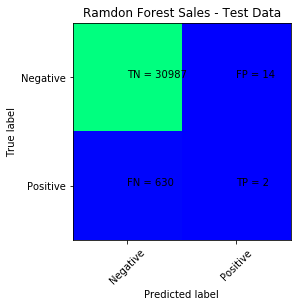

In [17]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.winter)
classNames = ['Negative','Positive']
plt.title('Ramdon Forest Sales - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [18]:
confusion_matrix(y_test,y_pred)

array([[30987,    14],
       [  630,     2]])

Report of classification

In [19]:
print(classification_report(y_test,y_pred))  

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     31001
          1       0.12      0.00      0.01       632

avg / total       0.96      0.98      0.97     31633



The accuracy achieved for by our random forest classifier with 20 trees is:

In [ ]:
print(accuracy_score(y_test, y_pred))  

0.979641513609


#### Visualization of one tree from the forest

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = classifier.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')